In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = lena.shape
lena_lsb = np.copy(lena)

In [3]:
for i in range(rows):
    for j in range(cols):
        if (i < rows//2 and j < cols//2) or (i >= rows//2 and j >= cols//2):
            lena_lsb[i, j] = lena_lsb[i, j] - (lena_lsb[i, j] % 2)     # Upper-left or bottom-right → LSB = 0
        else:
            lena_lsb[i, j] = lena_lsb[i, j] - (lena_lsb[i, j] % 2) + 1 # Upper-right or bottom-left → LSB = 1

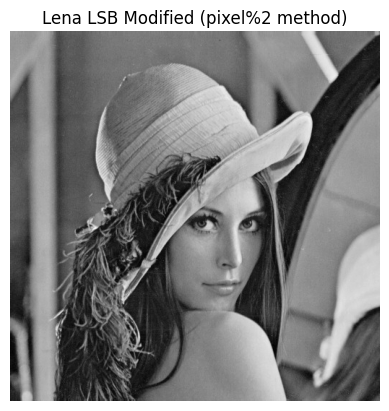

In [4]:
plt.imshow(lena_lsb, cmap='gray')
plt.title("Lena LSB Modified (pixel%2 method)")
plt.axis('off')
plt.show()

In [5]:
cv2.imwrite('lena_lsb_100.jpg', lena_lsb, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imwrite('lena_lsb_99.jpg', lena_lsb, [int(cv2.IMWRITE_JPEG_QUALITY), 99])
cv2.imwrite('lena_lsb_75.jpg', lena_lsb, [int(cv2.IMWRITE_JPEG_QUALITY), 75])

True

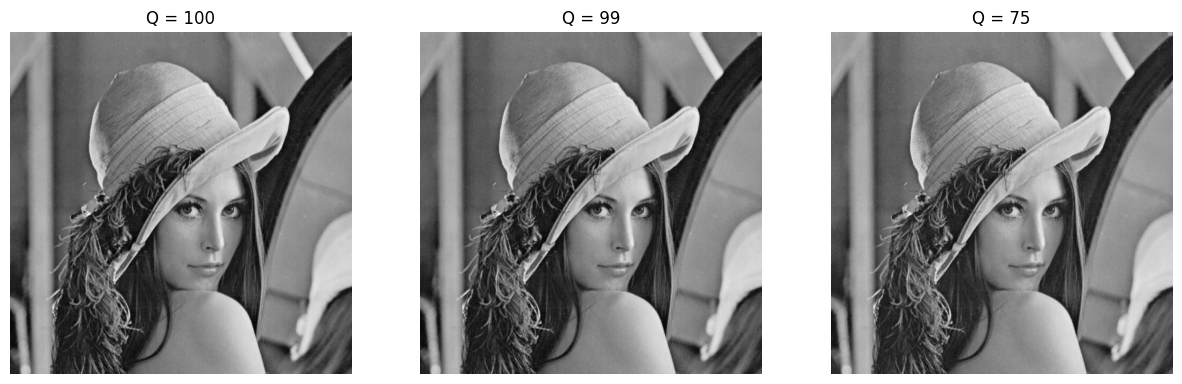

In [6]:
lena_lsb_100 = cv2.imread('lena_lsb_100.jpg', cv2.IMREAD_GRAYSCALE)
lena_lsb_99  = cv2.imread('lena_lsb_99.jpg', cv2.IMREAD_GRAYSCALE)
lena_lsb_75  = cv2.imread('lena_lsb_75.jpg', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(lena_lsb_100, cmap='gray')
axes[0].set_title('Q = 100')
axes[0].axis('off')

axes[1].imshow(lena_lsb_99, cmap='gray')
axes[1].set_title('Q = 99')
axes[1].axis('off')

axes[2].imshow(lena_lsb_75, cmap='gray')
axes[2].set_title('Q = 75')
axes[2].axis('off')

plt.show()

In [7]:
# The visual difference between the original Lena and the LSB-modified images is minimal; the image looks almost identical.
# You can be sure the LSB modification worked correctly by extracting the LSBs (pixel % 2) from the modified images and checking if they match the intended pattern (0 for upper-left/bottom-right, 1 for upper-right/bottom-left).

In [8]:
lena_lsb_100 = cv2.imread('lena_lsb_100.jpg', cv2.IMREAD_GRAYSCALE)
lena_lsb_99  = cv2.imread('lena_lsb_99.jpg', cv2.IMREAD_GRAYSCALE)
lena_lsb_75  = cv2.imread('lena_lsb_75.jpg', cv2.IMREAD_GRAYSCALE)
def extract_lsb(image):
    return image % 2  # 0 or 1
lsb_100 = extract_lsb(lena_lsb_100)
lsb_99  = extract_lsb(lena_lsb_99)
lsb_75  = extract_lsb(lena_lsb_75)

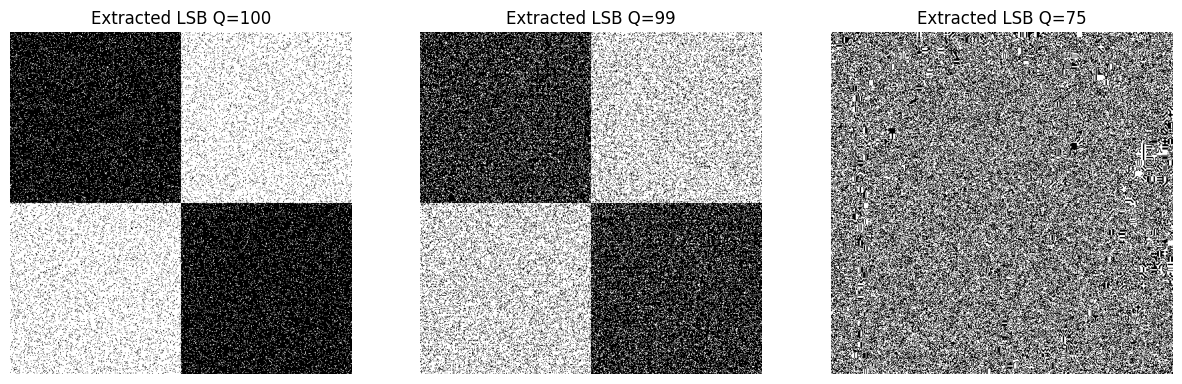

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(lsb_100, cmap='gray')
axes[0].set_title('Extracted LSB Q=100')
axes[0].axis('off')

axes[1].imshow(lsb_99, cmap='gray')
axes[1].set_title('Extracted LSB Q=99')
axes[1].axis('off')

axes[2].imshow(lsb_75, cmap='gray')
axes[2].set_title('Extracted LSB Q=75')
axes[2].axis('off')

plt.show()

In [ ]:
# At Q=100, the LSB pattern is perfectly preserved.
# At Q=99, most of the hidden pattern is still correct, minor distortions may appear.
# At Q=75, JPEG compression introduces significant changes; some LSBs are altered, partially destroying the hidden pattern.

# LSB steganography works well for lossless or high-quality JPEGs.
# Compression reduces the accuracy of the hidden data.
# Correctness is verified by extracting LSBs and visually comparing them to the expected pattern.